In [31]:
import numpy as np
import matplotlib.pyplot as plt
from numpy import pi
plt.ion()
plt.clf()

newparams = {'figure.figsize': (8.0, 3.0), 'axes.grid': True,}
plt.rcParams.update(newparams)

<Figure size 800x2000 with 0 Axes>

In [32]:
def example1():
    # Interpolation data
    xdata = [0, 2/3., 1]
    ydata = [1, 1/2., 0]

    # Interpolation polynomial
    p2 = lambda x : (-3 * x ** 2 - x + 4)/4.
    
    # Grid points for plotting
    x = np.linspace(0, 1, 100)
    y = p2(x)
    
    # Original function
    f = np.cos(pi*x/2)
    
    plt.plot(x, f, 'c', x, y, 'm', xdata, ydata, "ok")
    plt.legend(['$\cos(\pi x/2)$', 'p_2(x)', 'Interpolation data'])
# end example 1

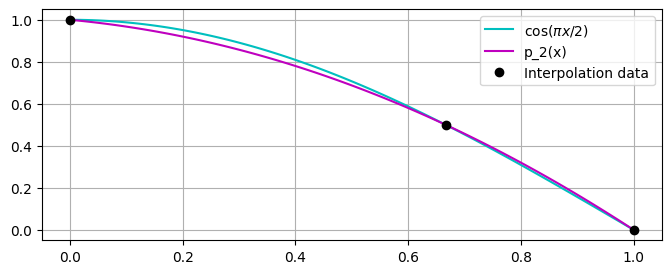

In [33]:
example1()

In [34]:
def cardinal(xdata, x):
    """
    cardinal(xdata, x): 
    In: xdata, array with the nodes x_i.
        x, array or a scalar of values in which the cardinal functions are evaluated.
    Return: l: a list of arrays of the cardinal functions evaluated in x. 
    """
    n = len(xdata)              # Number of evaluation points x
    l = []
    for i in range(n):          # Loop over the cardinal functions
        li = np.ones(len(x))
        for j in range(n):      # Loop to make the product for l_i
            if i is not j:
                li = li * (x - xdata[j]) / (xdata[i] - xdata[j])
        l.append(li)            # Append the array to the list            
    return l

def lagrange(ydata, l):
    """
    lagrange(ydata, l):
    In: ydata, array of the y-values of the interpolation points.
         l, a list of the cardinal functions, given by cardinal(xdata, x)
    Return: An array with the interpolation polynomial. 
    """
    poly = 0                        
    for i in range(len(ydata)):
        poly = poly + ydata[i]*l[i]  
    return poly
# end of lagrange


In [35]:
def divdiff(xdata, ydata):
    # Create the table of divided differences based
    # on the data in the arrays x_data and y_data. 
    n = len(xdata)
    F = np.zeros((n,n))
    F[:,0] = ydata             # Array for the divided differences
    for j in range(n):
        for i in range(n-j-1):
            F[i,j+1] = (F[i+1,j]-F[i,j])/(xdata[i+j+1]-xdata[i])
    return F                    # Return all of F for inspection. 
                                # Only the first row is necessary for the
                                # polynomial.

def newton_interpolation(F, xdata, x):
    # The Newton interpolation polynomial evaluated in x. 
    n, m = np.shape(F)
    xpoly = np.ones(len(x))               # (x-x[0])(x-x[1])...
    newton_poly = F[0,0]*np.ones(len(x))  # The Newton polynomial
    for j in range(n-1):
        xpoly = xpoly*(x-xdata[j])
        newton_poly = newton_poly + F[0,j+1]*xpoly
    return newton_poly
# end of newton_interpolation

def equidistributed_bound(n, M, a, b):
    # Return the bound for error in equidistributed nodes
    print(n)
    h = (b-a)/n
    return 0.25*h**(n+1)/(n+1)*M;
# end of equidistributed_bound

In [36]:
def chebyshev_nodes(a, b, n):
    # n Chebyshev nodes in the interval [a, b] 
    i = np.array(range(n))                 # i = [0,1,2,3, ....n-1]
    x = np.cos((2 * i + 1) * pi/(2 * (n)))         # nodes over the interval [-1,1]
    return 0.5 * (b - a) * x + 0.5 * (b + a)        # nodes over the interval [a,b]
# end of chebyshev_nodes

In [37]:
def divdiff(xdata,ydata):
    # Create the table of divided differences based
    # on the data in the arrays x_data and y_data. 
    n = len(xdata)
    F = np.zeros((n,n))
    F[:,0] = ydata             # Array for the divided differences
    for j in range(n):
        for i in range(n-j-1):
            F[i,j+1] = (F[i+1,j]-F[i,j])/(xdata[i+j+1]-xdata[i])
    return F                    # Return all of F for inspection. 
                                # Only the first row is necessary for the
                                # polynomial.

In [53]:
def example_runge_interpolation():
    # Define the function
    def f(x):
        return 1/(1+x**2)

    # Set the interval 
    a, b = -5, 5                       # The interpolation interval
    x = np.linspace(a, b, 101)         # The 'x-axis'

    newparams = {'figure.figsize': (8,20)}
    plt.rcParams.update(newparams)

    # Number of tests 
    num_runs = 4
    # Prepare plotting
    fig, axes = plt.subplots(2*num_runs,1)
    # Request a little bit more space between subplots
    fig.tight_layout(pad=3.0)
    for i in range(num_runs):
        n = 4*2**i
        xdata = np.linspace(a, b, n+1)     # Equidistributed nodes (can be changed)
        ydata = f(xdata)                

        # Evaluate the interpolation polynomial in the x-values
        l = cardinal(xdata, x)  
        p = lagrange(ydata, l)

        # Plot f(x) og p(x) and the interpolation points
        axes[2*i].plot(x, f(x), x, p, xdata, ydata, 'o')
        axes[2*i].legend(['f(x)','p(x)'])
        axes[2*i].grid(True)
        axes[2*i].set_title("Runge's example for n = {}".format(n))

        # Plot the interpolation error
        axes[2*i+1].plot(x, (f(x)-p))
        axes[2*i+1].set_xlabel('x')
        axes[2*i+1].set_ylabel('Error: f(x)-p(x)')
        axes[2*i+1].grid(True)
        print("Max error is {:.2e}".format(max(abs(p-f(x)))))
        
        # Save the figure for the second set of axes
        fig_error = plt.figure(figsize=(8, 4))
        plt.plot(x, (f(x)-p))
        plt.xlabel('x')
        plt.ylabel('Error: f(x)-p(x)')
        plt.grid(True)
        plt.title("Runge's example for n = {} - Error".format(n))
        plt.savefig("error_plot_n_{}.png".format(n))
        plt.close(fig_error)
    plt.show()
# end of example_runge_interpolation

def example_divided_differences():
    # Example: Use of divided differences and the Newton interpolation
    # formula. 
    xdata = [0, 2/3, 1]
    ydata = [1, 1/2, 0]
    F = divdiff(xdata, ydata)      # The table of divided differences
    print('The table of divided differences:\n',F)

    x = np.linspace(0, 1, 101)     # The x-values in which the polynomial is evaluated
    p = newton_interpolation(F, xdata, x)
    plt.plot(x, p)                  # Plot the polynomial
    plt.plot(xdata, ydata, 'o')     # Plot the interpolation points 
    plt.title('The interpolation polynomial p(x)')
    plt.grid(True)
    plt.xlabel('x');
# end of example_divided_differences


Max error is 4.38e-01
Max error is 1.05e+00
Max error is 1.41e+01
Max error is 4.67e+03


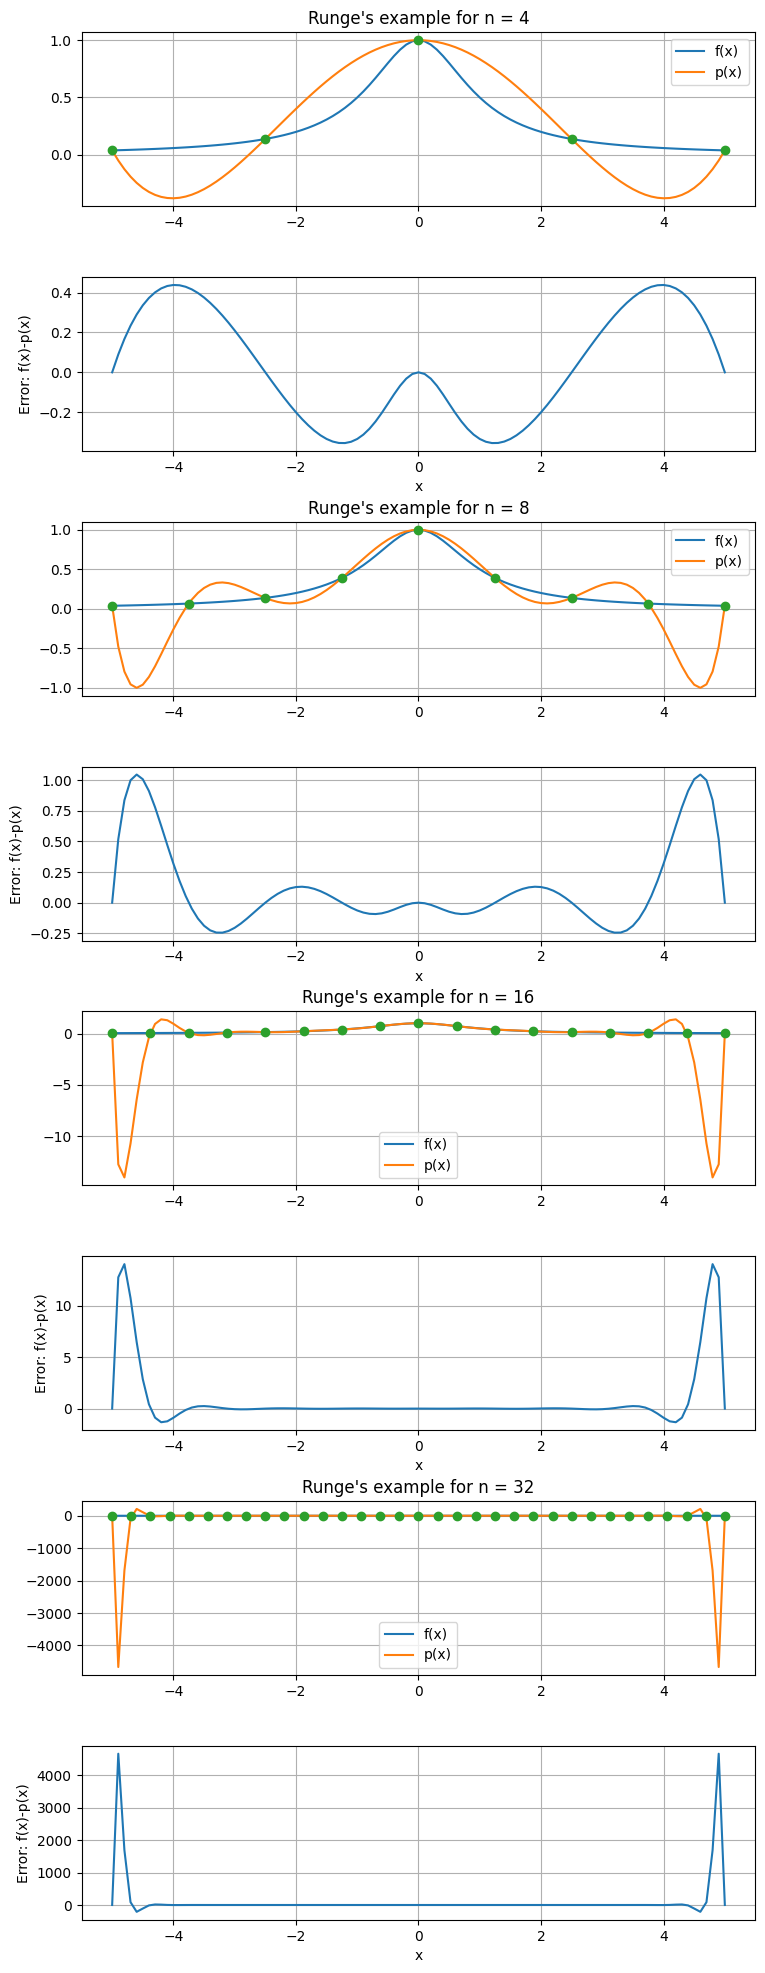

In [54]:
example_runge_interpolation()

In [40]:
def example_est_error_interpolation():
    # Define the function
    def f(x):
        return np.sin(x)

    # Set the interval 
    a, b = 0, 2*pi                  # The interpolation interval
    x = np.linspace(a, b, 101)         # The 'x-axis' 
    err_est  = []
    err_comp = []

    for n in [8, 16, 32, 64, 128, 256]:
        # Set the interpolation points
        xdata = np.linspace(a, b, n+1)     # Equidistributed nodes (can be changed)
        ydata = f(xdata)                

        # Evaluate the interpolation polynomial in the x-values
        l = cardinal(xdata, x)  
        p = lagrange(ydata, l)
        
        err_comp.append(max(abs(p-f(x))))
        print("Computed max error is {:.2e}".format(max(abs(p-f(x)))))
        err_est.append(1/(4*(n+1))*(2*pi/n)**(n+1))
        print("Estimated max error is {:.2e}".format(err_est[-1]))

    plt.figure(figsize=(8,4))
    plt.plot(range(1, 7), err_comp, 'o')
    plt.plot(range(1, 7), err_est, "x")
    plt.title("Error in interpolation when change number of nodes")
    plt.grid(True)
# end of example_est_error_interpolation()

Computed max error is 1.20e-03
Estimated max error is 3.16e-03
Computed max error is 6.45e-10
Estimated max error is 1.85e-09
Computed max error is 8.38e-10
Estimated max error is 3.54e-26
Computed max error is 9.14e-02
Estimated max error is 1.16e-68
Computed max error is 5.27e+16
Estimated max error is 2.65e-172
Computed max error is 2.99e+52
Estimated max error is 0.00e+00


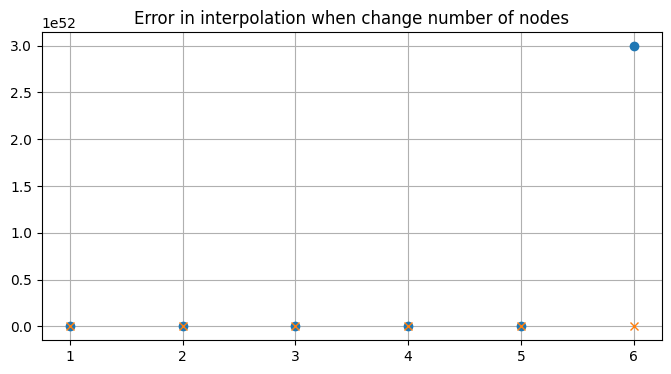

In [41]:
example_est_error_interpolation()

Max error is 1.42e-14


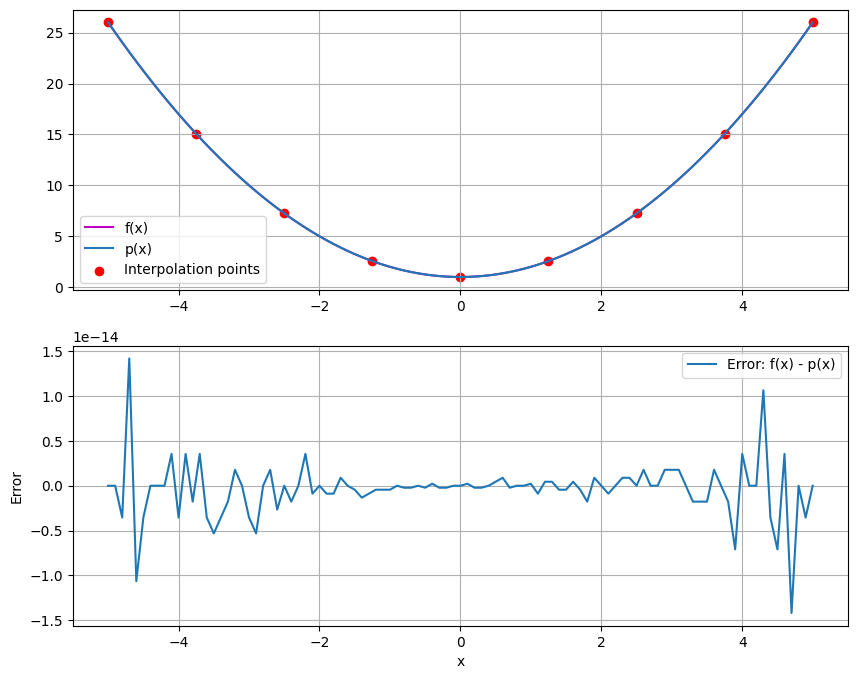

In [42]:
# Define the function
def f(x):
    return 1 / 1 + x ** 2

# Set the interval
a, b = -5, 5 # The interpolation interval
x = np.linspace(a, b, 101) # The ’x-axis’

# Set the interpolation points
n = 8 # Interpolation points
xdata = np.linspace(a, b, n + 1) # Equidistributed nodes (can be changed)
ydata = f(xdata)

# Evaluate the interpolation polynomial in the x-values
l = cardinal(xdata, x)
p = lagrange(ydata, l)

# Set the size of the plot
plt.figure(figsize=(10, 8))

# Plot f(x), p(x), and interpolation points
plt.subplot(2, 1, 1)
plt.plot(x, f(x), 'm', label='f(x)')
plt.plot(x, p, label='p(x)')
plt.scatter(xdata, ydata, color='red', marker='o', label='Interpolation points')
plt.legend()
plt.grid(True)

# Plot the interpolation error
plt.subplot(2, 1, 2)
plt.plot(x, (f(x) - p), label='Error: f(x) - p(x)')
plt.xlabel('x')
plt.ylabel('Error')
plt.legend()
plt.grid(True)

# Print the maximum error
print("Max error is {:.2e}".format(max(abs(p - f(x)))))

# Show the plots
plt.show()

In [61]:
def omega(xdata, x):
    # compute omega(x) for the nodes in xdata
    n1 = len(xdata)
    omega_value = np.ones(len(x))             
    for j in range(n1):
        omega_value = omega_value*(x-xdata[j])  # (x-x_0)(x-x_1)...(x-x_n)
    return omega_value
# end of omega

def plot_omega():
    # Plot omega(x) 
    n = 32  # Number of interpolation points is n+1
    a, b = -1, 1 # The interval
    x = np.linspace(a, b, 501)     
    xdata = np.linspace(a, b, n) 

    plt.figure(figsize=(8, 3))
    plt.plot(x, omega(xdata, x))
    plt.grid(True)
    plt.xlabel('x')
    plt.ylabel('omega(x)')
    print("n = {:2d}, max|omega(x)| = {:.2e}".format(n, max(abs(omega(xdata, x)))))
# end of plot_omega

n = 32, max|omega(x)| = 5.76e-06


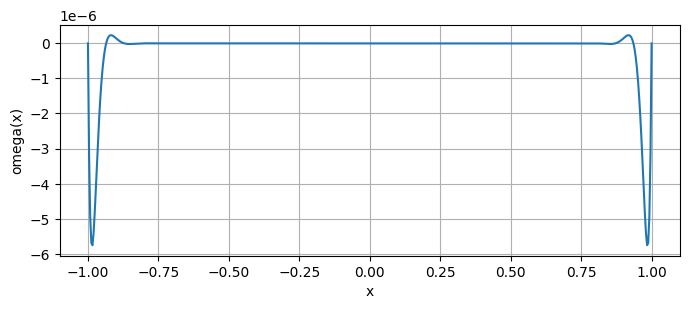

In [62]:
plot_omega()

[ 0.99518473  0.95694034  0.88192126  0.77301045  0.63439328  0.47139674
  0.29028468  0.09801714 -0.09801714 -0.29028468 -0.47139674 -0.63439328
 -0.77301045 -0.88192126 -0.95694034 -0.99518473]


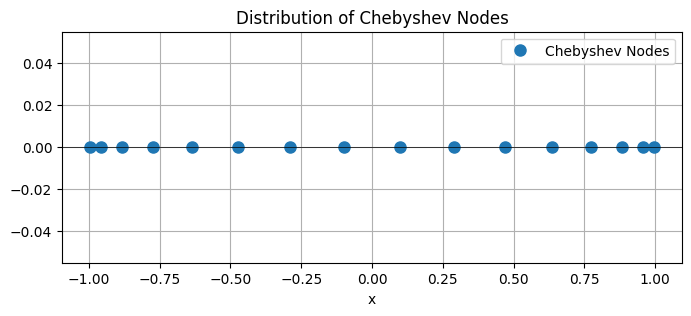

In [68]:
# Number of Chebyshev nodes
n = 16

# Generate Chebyshev nodes
cheb_nodes = chebyshev_nodes(-1, 1, n)
print(cheb_nodes)
# Plot the distribution of Chebyshev nodes

plt.figure(figsize=(8, 3))
plt.plot(cheb_nodes, np.zeros_like(cheb_nodes), 'o', markersize=8, label='Chebyshev Nodes')
plt.title('Distribution of Chebyshev Nodes')
plt.xlabel('x')
plt.axhline(0, color='black',linewidth=0.5)
plt.legend()
plt.show()